# I. Wind3 profiles

## 1. import modules and constants

In [10]:
import numpy as np
from math import pi,log
import  matplotlib.pyplot as plt
clight=3e10 #cm/s
Msun=2e33 #g
  

## 2. velocity and radius

In [11]:
vmax = 0.2*clight
vmin = 0.05*clight
Rmax = 1e9 #cm
Rmin = Rmax*vmin/vmax


n_slices=3000
V_of_R = np.linspace(vmin,vmax,n_slices)
R_coordinates = V_of_R/vmax*Rmax


## 3. mass distribution

In [12]:

Mtotal=0.01*Msun
#rho = k/r^3
k = Mtotal/(4*pi*log(Rmax/Rmin))

Mass_coordinates=np.zeros(n_slices)
for i in range(n_slices-1):
    Mass_coordinates[i+1] = Mass_coordinates[i] + 4*pi*k*log(R_coordinates[i+1]/R_coordinates[i])

Rho = k/(R_coordinates**3)

## 4. temperature, ye, entropy, expansion timescale

In [13]:
T = 1e9 
ye = 0.4
entropy = 10.0 #[kb/baryon]
tau = 10.0e-3 #[s] 

## 5. output profile

In [14]:
with open("wind3_0.01M_0.2c_ye0.4_s10_tau10.dat",'w') as outputfile1:
    outputfile1.write('#      index      mass[g]      radius[cm]      temperature[K]      density[g/cm^3]      velocity[cm/s]      ye(initial)      entropy[kb/baryon]      expansion_timescale[s]\n')
    outputfile1.write(str(len(R_coordinates))+'\n')
    for i in range(len(R_coordinates)):
        s0=str(i+1).rjust(6," ")
        s1="     %.9e" %Mass_coordinates[i]
        s2="     %.9e" %R_coordinates[i]
        s3="     %.9e" %T
        s4="     %.9e" %Rho[i]
        s5="     %.9e" %V_of_R[i]
        s6="     %.9e" %ye
        s7="     %.9e" %entropy
        s8="     %.9e" %tau

        outputfile1.write(s0+s1+s2+s3+s4+s5+s6+s7+s8+'\n')

# II. Wind38 profiles (k1 = 3, k2 = 8)

$ \rho = a r^{-k1}, r_{min} \le r<r_{0}$

$\rho = b r^{-k2}, r_{0}\le r \le r_{max}$

$(a r_{0}^{-k1} = b r_{0}^{-k2}), k2>k1, k2>3$

$v \propto r$

$Ye, s(entropy), \tau(expansion\ timescale) = const$

choice1: $T = const$

choice2:
$T = const = T_0, r_{min} \le r<r_{0};$

$T = T_0 (\frac{r_0}{r})^{\alpha}, r_{0}\le r \le r_{max}$

## 1. import modules and constants

In [7]:
import numpy as np
from math import pi,log
import  matplotlib.pyplot as plt
clight=3e10 #cm/s
Msun=2e33 #g
  

## 2. choose velocity and rmin,r0,rmax

In [8]:
vmax = 0.2*clight
v0 = 0.15*clight
vmin = 0.05*clight

rmax = 1e9 #cm
r0 = v0/vmax*rmax
rmin = vmin/vmax*rmax


n_slices=3000
Velocity = np.linspace(vmin,vmax,n_slices)
Radius = Velocity/vmax*rmax
Mass=np.zeros(n_slices)
Density = np.zeros(n_slices)


## 3. mass distribution

In [16]:
Mtotal=0.01*Msun
k1 = 3
k2 = 8

assert k2>k1,"k2 must be larer than k1"
assert k2>3,"k2 must be larger than 3"

if (k1!=3):
    b_over_a = r0**(k2-k1)
    M_over_a = (r0**(3-k1)-rmin**(3-k1))/(3-k1) + (rmax**(3-k2)-r0**(3-k2))/(3-k2)*b_over_a
    M_over_a *= 4*pi
    a = Mtotal/M_over_a
    b = b_over_a * a
    
    rho_outer = b/rmax**k2
    assert rho_outer>0,"density at outer boundary must be positive!"
    
if (k1==3):
    b_over_a = r0**(k2-k1)
    M_over_a = np.log(r0/rmin) + (rmax**(3-k2)-r0**(3-k2))/(3-k2)*b_over_a
    M_over_a *= 4*pi
    a = Mtotal/M_over_a
    b = b_over_a * a
    
    rho_outer = b/rmax**k2
    assert rho_outer>0,"density at outer boundary must be positive!"
    
for i in range(len(Radius)):
    r = Radius[i]
    if (rmin <= r < r0):
        Density[i] = a/r**k1
        if (k1!=3):
            Mass[i] = (r**(3-k1)-rmin**(3-k1))/(3-k1)*4*pi*a
        elif (k1==3):
            Mass[i] = 4*pi*a*np.log(r/rmin)
            
        
    elif (r0<= r <= rmax):
        Density[i] = b/r**k2
        if (k1!=3):
            M0 = (r0**(3-k1)-rmin**(3-k1))/(3-k1)*4*pi*a
        elif (k1==3):
            M0 = 4*pi*a*np.log(r0/rmin)
        Mass[i] = M0 + (r**(3-k2)-r0**(3-k2))/(3-k2)*4*pi*b
        
    




## 4.choose temperature, ye, entropy, expansion timescale

In [10]:

ye = 0.4
entropy = 10.0 #[kb/baryon]
tau = 10.0e-3 #[s] 

T0 = 1e9 
alpha = 8
Temperature = np.zeros(len(Radius))
for i in range(len(Temperature)):
    if Radius[i] <= r0:
        Temperature[i] = T0
    else:
        #choice 1: T = const
        Temperature[i] = T0
        
        #choice 2: T powerlaw decrease near outer boundary
        #Temperature[i] = T0*(r0/Radius[i])**alpha


## 5. output profiles and plots

In [11]:

filename="wind38_0.01M_0.2c_ye0.4_s10_tau10.dat"
with open(filename,'w') as outputfile1:
    outputfile1.write('#      index      mass[g]      radius[cm]      temperature[K]      density[g/cm^3]      velocity[cm/s]      ye(initial)      entropy[kb/baryon]      expansion_timescale[s]\n')
    outputfile1.write(str(len(Radius))+'\n')
    for i in range(len(Radius)):
        s0=str(i+1).rjust(6," ")
        s1="     %.9e" %Mass[i]
        s2="     %.9e" %Radius[i]
        s3="     %.9e" %Temperature[i]
        s4="     %.9e" %Density[i]
        s5="     %.9e" %Velocity[i]
        s6="     %.9e" %ye
        s7="     %.9e" %entropy
        s8="     %.9e" %tau

        outputfile1.write(s0+s1+s2+s3+s4+s5+s6+s7+s8+'\n')


Text(0.5, 0.98, 'wind 3-8 profile, M=0.01Msun \n(k1=3, k2=8)')

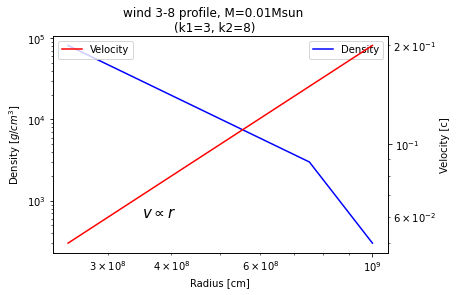

In [12]:
fig = plt.figure()
ax1=fig.add_subplot()
ax1.plot(Radius,Density,'b-',label='Density')
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Density $[g/cm^3]$')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(Radius,Velocity/3e10,'r-',label='Velocity')
ax2.set_yscale('log')
ax2.set_ylabel('Velocity [c]')
ax2.text(3.5e8,0.06,'$v \propto r$',fontsize=15)

plt.legend()
plt.suptitle('wind 3-8 profile, M=0.01Msun \n(k1=3, k2=8)')

In [43]:
plt.plot(Radius,Temperature)
    

NameError: name 'Radius' is not defined

# III. Wind-Ex profile (wind3+exponential decay, to be finished)

Density:

$ \rho = a r^{-k}, r_{min} \le r<r_{0}$

$\rho = a r_0^{-k} \cdot e^{- \lambda \frac{ (r-r0)}{r0} }, r_{0}\le r \le r_{max}$



Temperature:

$ T = T_0, r_{min} \le r<r_{0}$

$T = T_0 e^{- \lambda_2 \frac{ (r-r0)}{r0}}, r_{0}\le r \le r_{max}$

Velocity:

$ v \propto r , r_{min} \le r<r_{0}$

$ v = v(r=r_0), r_{0}\le r \le r_{max}$




Note:

\begin{aligned}
\int_{r_0}^{rmax} e^{- \lambda (\frac{r}{r_0}-1)} 4 \pi r^2 dr &= r_0^3  e^{\lambda} \int_1^{rmax/r_0} e^{-\lambda x} 4 \pi x^2 dx \\ &= r_0^3  e^{\lambda} \left[ - \frac{4 \pi e^{-\lambda x} (\lambda^2 x^2 +2\lambda x+2)}{\lambda^3}  \right]_1^{rmax/r_0}
\end{aligned} 

## 1. import modules and constants

In [1]:
import numpy as np
from math import *
import  matplotlib.pyplot as plt
clight=3e10 #cm/s
Msun=2e33 #g

## 2. select exponential factor 

In [72]:
#for density:
l = 3

def I_lambda(x,l):
    return -4*pi*exp(-l*x)*( l**2*x**2 + 2*l*x + 2)/l**3

#for temperature:
l_T = 3    

## 3. set radius, mass distribution

In [82]:
M_over_Msun = 0.01 
Mtotal=M_over_Msun*Msun
rmin = 1e9*0.25 #cm
r0 = 1e9
rmax = 5e9

# powerlaw index for density:
k = 3 # wind3


if (k!=3):
    b = r0**(3-k)*exp(l) 
    M_over_a = 4*pi*(r0**(3-k)-rmin**(3-k))/(3-k) +  (I_lambda(rmax/r0,l)-I_lambda(1,l))*b
    a = Mtotal/M_over_a
  
    
    
if (k==3):
    b = r0**(3-k)*exp(l) 
    M_over_a = 4*pi*log(r0/rmin) +  (I_lambda(rmax/r0,l)-I_lambda(1,l))*b
    a = Mtotal/M_over_a
    

    
if (k!=3):
    print("mass (rmin~r0) [Msun]:", 4*pi*(r0**(3-k)-rmin**(3-k))/(3-k)*a/Msun)
if(k==3):
    print("mass (rmin~r0) [Msun]:", 4*pi*log(r0/rmin)*a/Msun)

    
print("mass (r0~rmax) [Msun]:",(I_lambda(rmax/r0,l)-I_lambda(1,l))*b*a/Msun)   
    
n_slices=3000
Radius = np.linspace(rmin,rmax,n_slices)
Density = np.zeros(n_slices)
Mass = np.zeros(n_slices)

for i in range(n_slices):
    r = Radius[i]
    if r<= r0:
        Density[i] = a*r**(-k) 
        if(k!=3):
            Mass[i] = 4*pi*a*(r**(3-k)-rmin**(3-k))/(3-k) 
        else:    
            Mass[i] = 4*pi*a*log(r/rmin)
    else:
        Density[i] = a*r0**(-k)*exp(-l*(r/r0-1))
        Mass[i] = (I_lambda(r/r0,l)-I_lambda(1,l))*b*a
        if (k!=3):
            Mass[i] += 4*pi*a*(r0**(3-k)-rmin**(3-k))/(3-k)
        else:
            Mass[i] += 4*pi*a*log(r0/rmin)
        
   



mass (rmin~r0) [Msun]: 0.006876918903270681
mass (r0~rmax) [Msun]: 0.003123081096729319


Text(0, 0.5, 'Density [g cm$^{-3}$]')

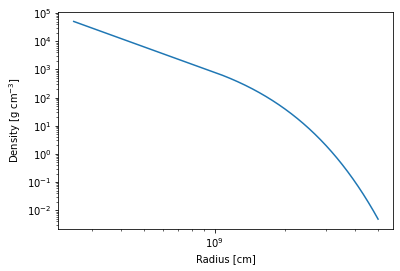

In [74]:

plt.plot(Radius,Density)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Radius [cm]')
plt.ylabel('Density [g cm$^{-3}$]')


[1.99999523e+31 1.99999549e+31 1.99999575e+31 1.99999601e+31
 1.99999627e+31 1.99999652e+31 1.99999678e+31 1.99999703e+31
 1.99999728e+31 1.99999754e+31 1.99999779e+31 1.99999804e+31
 1.99999829e+31 1.99999853e+31 1.99999878e+31 1.99999903e+31
 1.99999927e+31 1.99999952e+31 1.99999976e+31 2.00000000e+31]


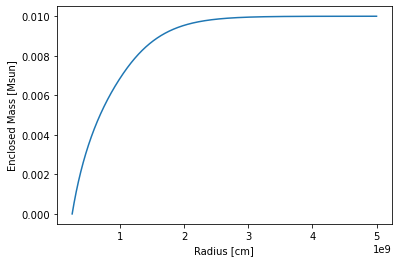

In [80]:
plt.plot(Radius,Mass/Msun)
plt.xlabel('Radius [cm]')
plt.ylabel('Enclosed Mass [Msun]')

print(Mass[-20:])

## 4. Temperature, Velocity, Ye, Entropy, Expansion Timescale



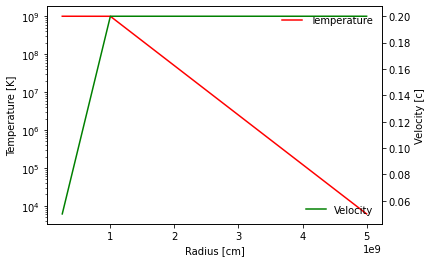

In [101]:
Temperature = np.zeros(n_slices)
T0 = 1e9 #K
Velocity= np.zeros(n_slices)
vmax_c = 0.2
vmax = vmax_c*clight
vmin = rmin/r0*vmax

ye = 0.1
entropy = 10 #[kb/baryon]
tau_ms = 10
tau = tau_ms * 1e-3 #[s] 

for i in range(n_slices):
    r = Radius[i]
    if(r<=r0):
        Temperature[i] = T0
        Velocity[i] = r/r0*vmax
    else:
        Temperature[i] = T0*exp(-l_T*(r/r0-1))
        Velocity[i] = vmax
        
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(Radius, Temperature,'r-',label='Temperature')
#ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(frameon=False)
ax1.set_xlabel('Radius [cm]')
ax1.set_ylabel('Temperature [K]')

ax2 = ax1.twinx()
ax2.plot(Radius,Velocity/clight,'g-',label='Velocity')
ax2.set_ylabel('Velocity [c]')
ax2.legend(frameon=False)



## 5. output

In [102]:

filename="wind"+str(k)+"ex"+str(l)+"-Tex"+str(l_T)+"_"+str(M_over_Msun)+"M_"+str(vmax_c)+"c_ye"+str(ye)+"_s"+str(entropy)+"_tau"+str(tau_ms)+".dat"
print("filename:",filename)


filename: wind3ex3-Tex3_0.01M_0.2c_ye0.1_s10_tau10.dat


In [103]:
with open(filename,'w') as outputfile1:
    outputfile1.write('#      index      mass[g]      radius[cm]      temperature[K]      density[g/cm^3]      velocity[cm/s]      ye(initial)      entropy[kb/baryon]      expansion_timescale[s]\n')
    outputfile1.write(str(len(Radius))+'\n')
    for i in range(len(Radius)):
        s0=str(i+1).rjust(6," ")
        s1="     %.9e" %Mass[i]
        s2="     %.9e" %Radius[i]
        s3="     %.9e" %Temperature[i]
        s4="     %.9e" %Density[i]
        s5="     %.9e" %Velocity[i]
        s6="     %.9e" %ye
        s7="     %.9e" %entropy
        s8="     %.9e" %tau

        outputfile1.write(s0+s1+s2+s3+s4+s5+s6+s7+s8+'\n')